In [1]:
from PIL import ImageFont, Image, ImageDraw
from fontTools.ttLib.ttFont import TTFont
import numpy as np


In [31]:
font = "data/fonts/simkai.ttf"
img_size = 64
f = ImageFont.truetype(font, img_size, layout_engine=ImageFont.Layout.BASIC)
s = []

In [1]:
from OpenAttack.data_manager import DataManager
a,b,c=DataManager.load("AttackAssist.FYH")

In [2]:
d=DataManager.load("AttackAssist.SIM")

In [4]:
next(iter(d.items()))

('兪', ['俞'])

In [6]:
_="q"
with open(f"{_}.txt","w",encoding="utf8") as f:
    for index,chara in enumerate(d):
        if index%20==19:
            f.write("\n")
        f.write(chara+"->"+" ".join(d[chara])+"\t")

In [30]:
f.getmask2('二')

(<ImagingCore at 0x23f472c1430>, (0, 16))

In [32]:
for i in TTFont(font).getBestCmap():
    s.append((i, np.array(f.getmask(chr(i)))))

In [23]:
qq = {i: [] for i in set(i.shape for _, i in s)}
for i, j in s:
    qq[j.shape].append(chr(i))

In [33]:
[qq[i] for i in qq.keys() if len(qq[i]) < 500]

[['"', '0', '2', '3'],
 ['ɑ'],
 ['+', 'y'],
 ['^', '`', 'j'],
 ['_'],
 ['#',
  '5',
  '7',
  'B',
  'D',
  'E',
  'F',
  'H',
  'I',
  'J',
  'K',
  'L',
  'M',
  'N',
  'P',
  'R',
  'T',
  'U',
  'V',
  'W',
  'X',
  'Y',
  'Z',
  'b',
  'd',
  'h',
  'i',
  'k',
  'l',
  'ê'],
 ['u', 'v', 'w', 'x', 'z'],
 ['.'],
 [';'],
 ['[', ']', '{', '}'],
 ['á', 'ì', 'í', 'ò', 'ó', 'ù', 'ú', 'ń', 'ǹ'],
 ['$', '(', ')'],
 ['Q'],
 ['t', 'ē', 'ī', 'ō'],
 ['\\', '－'],
 ['g', 'p', 'q', 'ü', 'ā', 'ū', '︵', '︹'],
 ['ˇ',
  'ˊ',
  'ˋ',
  'Ц',
  '№',
  '∏',
  '∑',
  '√',
  '≤',
  '≦',
  '≧',
  '⒈',
  '⒉',
  '⒋',
  '⒌',
  '⒍',
  '⒎',
  '⒏',
  '⒒',
  '⒕',
  '⒖',
  '⒗',
  '⒘',
  '⒙',
  '⺌',
  '⺳',
  '⿻',
  'ぬ',
  'ひ',
  'べ',
  'ほ',
  'り',
  '゜',
  'イ',
  'ウ',
  'オ',
  'ト',
  'ド',
  'バ',
  'ヤ',
  'ヾ',
  'ㄊ',
  'ㄐ',
  'ㄠ',
  'ㄣ',
  'ㄤ',
  'ㄨ',
  '口',
  '﹀',
  '＋',
  'Ｑ',
  '￢'],
 ['α', 'а', 'д', 'е', 'з', 'о', 'с', 'э', 'ю', '╓', '╖', '╥', '╭', '╮', '︽'],
 ['ρ', 'у', 'ё', 'つ', 'へ', 'ス', 'ヱ', '﹗', '﹡'],
 ['‖', 

In [2]:
from hanzi_chaizi import HanziChaizi

hc = HanziChaizi()

In [11]:
# a = set()

with open("replace.txt", "r", encoding='utf-8') as f:
    _dict = {}
    for line in f:
        q, p = line.split()
        _dict[q] = p
        # a.add(q)
        # if p in a:
        #     print(f"{p}->{q}")
a=set(_dict)
replace=set("丨丿一丶㇉")

In [5]:

from enum import IntEnum,auto
class HanziStructure(IntEnum):
    """
    汉字结构枚举，用于描述汉字的结构
    """
    独体=0
    左右=auto()
    上下=auto()
    左中右=auto()
    上中下=auto()
    右上包围=auto()
    左上包围=auto()
    左下包围=auto()
    上三包围=auto()
    下三包围=auto()
    左三包围=auto()
    全包围=auto()
    镶嵌=auto()
    品字=auto()

HanziStructure(0)

<HanziStructure.独体: 0>

In [14]:
import pickle
with open("../../Data/chinese-word-structure/结构字典（20000字）.txt","r",encoding="utf8") as f:
    stru=eval(f.read())
stru={key:int(value) for key,value in stru.items()}
pickle.dump(stru,open("../../Data/MyHanziData/HanziStructure.pkl","wb"))

In [20]:
from collections import Counter
qwer=Counter(stru.values())

In [6]:
with open("../../Data/chinese-word-structure/chinese_word_structure_14k.tsv", "r", encoding="utf8") as f:
    for line in f:
        s = line.strip().split()
        if s[0] in "".join(s[1:]):
            print(line)


冰	冰 水	冫 水

掷	手 掷 郑	扌 郑

病	病 丙	疒 丙

丝	丝 丝	纟 纟

草	草 早	艸 早	艹 早

虎	虎 儿	虍 儿



In [7]:
data = {}
# a={"才":"扌"}
import pickle
with open("../../Data/chinese-word-structure/chinese_word_structure_14k.tsv", "r", encoding="utf8") as f:
    for line in f:
        key, *items = line.strip().split('\t')
        s = items[-1].strip().split()  # 选择第一个然后做一些改动
        for index,c in enumerate(s[:]):
            if c == "才":
                s[index]="扌"
        # if len(s) > 3:
        #     continue
        # s-=replace
        # qqq=a&s
        # s-=qqq
        # print(a,s,qqq)
        # s.update(_dict[_] for _ in qqq)
        # # if t:=a.intersection(s):
        #     for i in t:
        #         s[s.index(i)]=_dict[i]
            # temp1=sorted([i.strip().split() for i in items],key=len)
            # 有序所以不用排序
            # temp1=[i for i in temp1 if len(i)==i[0]]

        data[key.strip()] = tuple(s)

In [8]:
with open("../../Data/MyHanziData/HanziSplit.pkl","wb") as f:
    pickle.dump(data,f)

In [17]:
with open("data/MyHanziData/HanziSplit.txt","w",encoding="utf8") as f:
    for chara,sps in data.items():
        f.write(f"{chara}->{' '.join(sps)}\n")

In [35]:
sp_chars={}
for chara,splits in data.items():
    for sp in splits:
        if sp in sp_chars:
            sp_chars[sp].append(chara)
        else:
            sp_chars[sp]=[chara]
list(sp_chars.items())[:10]

[('一',
  ['丁',
   '丂',
   '丄',
   '丅',
   '万',
   '丈',
   '三',
   '三',
   '三',
   '上',
   '下',
   '丌',
   '不',
   '丑',
   '丑',
   '丒',
   '且',
   '丕',
   '世',
   '丘',
   '丙',
   '丞',
   '丠',
   '両',
   '丹',
   '乎',
   '乞',
   '干',
   '亊',
   '事',
   '二',
   '二',
   '亍',
   '亐',
   '互',
   '亓',
   '亚',
   '亟',
   '亠',
   '亼',
   '亾',
   '同',
   '令',
   '仺',
   '佀',
   '布',
   '佱',
   '来',
   '侯',
   '侴',
   '俞',
   '伤',
   '佥',
   '佥',
   '兀',
   '兜',
   '兦',
   '两',
   '其',
   '具',
   '兼',
   '冇',
   '冉',
   '册',
   '再',
   '再',
   '冡',
   '凬',
   '凵',
   '前',
   '十',
   '卄',
   '卅',
   '半',
   '卌',
   '卝',
   '卝',
   '卮',
   '印',
   '厷',
   '叀',
   '友',
   '丛',
   '口',
   '右',
   '司',
   '合',
   '后',
   '吏',
   '呸',
   '命',
   '咸',
   '善',
   '喜',
   '单',
   '嗀',
   '嘉',
   '嘼',
   '噩',
   '噩',
   '噩',
   '嚢',
   '囊',
   '囊',
   '囍',
   '囍',
   '囗',
   '土',
   '在',
   '坙',
   '垖',
   '壌',
   '壑',
   '士',
   '壴',
   '夀',
   '夏',
   '夒',
   '夔',
   '大',
   '天',
   '夷',
   '夹',
   '奉',
 

In [18]:
all_sp=set(__ for _ in data.values() for __ in _ )
sp_chars={name:[] for name in all_sp}
for chara,splits in data.items():
    for sp in splits:
        sp_chars[sp].append(chara)
sp_chars={name:tuple(chars) for name,chars in sp_chars.items()}

In [19]:
with open("data/MyHanziData/all_splits.txt","w",encoding="utf8") as f:
    f.write(" ".join(all_sp))
with open("data/MyHanziData/ReserveDict.pkl","wb") as f:
    pickle.dump(sp_chars,f)


In [30]:
splitable={char:data[char] for char in data if stru.get(char,HanziStructure.独体) in [HanziStructure.左右,HanziStructure.左中右]}#,HanziStructure.左下包围,HanziStructure.上中下]}
list(splitable.items())[-20:]

[('龃', ('齿', '且')),
 ('龆', ('齿', '召')),
 ('龄', ('齿', '令')),
 ('龈', ('齿', '艮')),
 ('龊', ('齿', '足')),
 ('龉', ('齿', '吾')),
 ('龋', ('齿', '禹')),
 ('龌', ('齿', '屋')),
 ('龡', ('龠', '欠')),
 ('龢', ('龠', '禾')),
 ('龣', ('龠', '录')),
 ('龤', ('龠', '皆')),
 ('刾', ('夹', '刂')),
 ('鲃', ('鱼', '巴')),
 ('鳚', ('鱼', '尉')),
 ('鳤', ('鱼', '管')),
 ('鹮', ('睘', '鸟')),
 ('呣', ('口', '母')),
 ('嚒', ('口', '麼')),
 ('嚡', ('口', '鞋'))]

In [29]:
def to_mars(_s:str):
    _=[]
    for char in _s:
        if char in all_sp :
            print(f"{char}->{' '.join(sp_chars[char])}")
            _.append(sp_chars[char][0])
        else:
            print(char)
            _.append(char)
    return "".join(_)

In [28]:
def flatten_hanzi(_s:str):
    _=[]
    for i in _s:
        if i in splitable:
            _.extend(splitable[i])
        else:
            _.append(i)
    return "".join(_)

In [9]:
flatten_hanzi("这么美好的心情也要必备啊")

'这么美女子白勺心忄青也要必备囗阿'

In [30]:
to_mars("现在我代表火星人为你俩主持公道")

现
在->恠 茬
我->俄 哦 娥 峨 涐 珴 皒 睋 硪 莪 蛾 锇 饿 鹅
代->岱 帒 柋 牮 玳 笩 蚮 袋 贷 鴏 黛
表->俵 婊 脿 裱 㧼
火->炎 炏 焱 焱 燊 燊 燚 燚 燚 燮 爕 爕 爚 謍
星->惺 戥 暒 湦 煋 猩 瑆 睲 篂 腥 醒
人->仌 两 坐 巫 庻 从 众 众 臮 蕐 蕐 蕐 赍 韱
为->伪 妫 沩
你->您
俩
主->住 妵 宔 往 拄 柱 樦 殶 注 炷 疰 砫 罜 蛀 跓 迬 隹 驻 麈 黈
持
公->伀 妐 彸 忩 忪 昖 松 枀 棇 炂 玜 瓮 翁 舩 蚣 衳 衮 讼 颂
道->噵 檤


'现恠俄岱俵炎惺仌伪您俩住持伀噵'

In [3]:
aa = []
for _ in data.values():
    aa.extend(_)

In [4]:
from collections import Counter

c = Counter(aa)

In [8]:
aaa=set(aa)
count=0
with open("all_sp.txt","w",encoding="utf8") as f:
    for sp in sorted(aaa,key=lambda x: c[x]):
        if c[sp]>1 :
            count+=1
            f.write(sp+" ")
            if count%20 == 19:
                f.write("\n")

In [7]:
len([i for i in set(aa) if c[i]>1])

1376

In [22]:
c.most_common(5)

[('氵', 848), ('囗', 809), ('木', 793), ('艹', 773), ('才', 655)]

In [31]:
import matplotlib.pyplot as plt
def pie(_d):
    plt.pie(_d.values(),
            labels=[int(_) for _ in _d.keys()],  # 设置饼图标签
            # autopct='%.2f%%',  # 格式化输出百分比
            )
    plt.show()

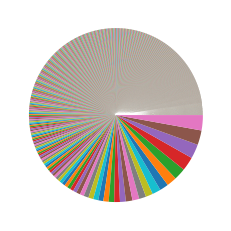

In [24]:
pie(c)

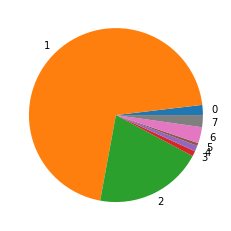

In [32]:
pie(qwer)

In [38]:
qq={name:[] for name in set(aa)}
for chara,splits in data.items():
    for sp in splits:
        qq[sp].append(chara)

In [43]:
list(qq.items())[:50]

[('徹', ['勶']),
 ('圼', ['捏', '涅', '陧']),
 ('品', ['偘', '匲', '喦', '嵒', '嵓', '操', '榀', '澡', '煰', '燥', '癌', '碞', '蕚', '躁']),
 ('豚', ['遯']),
 ('忽', ['唿', '惚', '淴', '锪', '㧾']),
 ('心', ['惢', '惢']),
 ('從', ['摐', '漎', '踨']),
 ('少',
  ['京',
   '亰',
   '仦',
   '仯',
   '光',
   '劣',
   '単',
   '原',
   '叔',
   '吵',
   '唢',
   '尝',
   '当',
   '喾',
   '坣',
   '尘',
   '夵',
   '妙',
   '孙',
   '学',
   '尐',
   '少',
   '尒',
   '尓',
   '尕',
   '尖',
   '尗',
   '尚',
   '尛',
   '尜',
   '尞',
   '尟',
   '尠',
   '峃',
   '应',
   '抄',
   '朩',
   '杪',
   '东',
   '步',
   '歩',
   '杀',
   '沙',
   '渺',
   '泶',
   '炒',
   '爫',
   '尔',
   '玅',
   '琐',
   '省',
   '眇',
   '砂',
   '示',
   '秒',
   '竗',
   '粆',
   '糸',
   '纱',
   '缈',
   '耖',
   '肖',
   '觉',
   '觘',
   '赻',
   '钞',
   '锁',
   '雀',
   '鲎',
   '鸴',
   '麨',
   '黉',
   '𨈓']),
 ('寅', ['夤', '戭', '殥', '演', '璌', '瞚', '蔩', '螾']),
 ('祭', ['傺', '察', '憏', '摖', '暩', '漈', '瘵', '磜', '穄', '蔡']),
 ('且',
  ['伹',
   '俎',
   '冝',
   '刞',
   '助',
   '咀',
   '坥',
   '姐',
   '宜',
   

In [52]:
def get_simliar(char):
    if char not in data:
        raise Exception("dont have word")
    _all=set()
    for sp in data[char]:
        _all.update(qq[sp])
    _all.remove(char)
    return _all

In [53]:
get_simliar("论")

{'䜥',
 '䜩',
 '伦',
 '信',
 '唁',
 '囵',
 '圁',
 '娮',
 '寣',
 '悥',
 '抡',
 '沦',
 '狱',
 '狺',
 '琂',
 '瘪',
 '纶',
 '罚',
 '訇',
 '訔',
 '訚',
 '訾',
 '詈',
 '詟',
 '詧',
 '誉',
 '誊',
 '誓',
 '誖',
 '誯',
 '諅',
 '諐',
 '諬',
 '謈',
 '謦',
 '謩',
 '謷',
 '謽',
 '譀',
 '譍',
 '譥',
 '警',
 '譬',
 '譱',
 '譶',
 '讐',
 '讙',
 '计',
 '订',
 '讣',
 '认',
 '讥',
 '讦',
 '讧',
 '讨',
 '让',
 '讪',
 '讫',
 '讬',
 '训',
 '议',
 '讯',
 '记',
 '讱',
 '讲',
 '讳',
 '讴',
 '讵',
 '讶',
 '讷',
 '许',
 '讹',
 '讻',
 '讼',
 '讽',
 '设',
 '访',
 '诀',
 '证',
 '诂',
 '诃',
 '评',
 '诅',
 '识',
 '诇',
 '诈',
 '诉',
 '诊',
 '诋',
 '诌',
 '词',
 '诎',
 '诏',
 '诐',
 '诒',
 '诓',
 '诔',
 '试',
 '诖',
 '诗',
 '诘',
 '诙',
 '诚',
 '诛',
 '诜',
 '话',
 '诞',
 '诟',
 '诠',
 '诡',
 '询',
 '诣',
 '诤',
 '该',
 '详',
 '诧',
 '诨',
 '诩',
 '诪',
 '诫',
 '诬',
 '语',
 '诮',
 '误',
 '诰',
 '诱',
 '诲',
 '诳',
 '说',
 '诵',
 '诶',
 '请',
 '诸',
 '诹',
 '诺',
 '读',
 '诼',
 '诽',
 '课',
 '诿',
 '谀',
 '谁',
 '谂',
 '调',
 '谄',
 '谅',
 '谆',
 '谇',
 '谈',
 '谉',
 '谊',
 '谋',
 '谌',
 '谍',
 '谎',
 '谏',
 '谐',
 '谑',
 '谒',
 '谓',
 '谔',
 '谕',
 '谖',
 '谗',
 '谘',
 '谙',
 '谚'

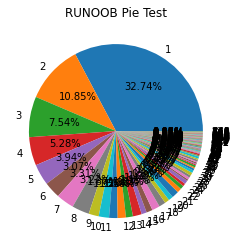

In [74]:
d = Counter(c.values())  # 对部首出现的次数进行统计


i = {_: __ for _, __ in sorted(d.items())}  #,key=lambda x:x[1])


In [8]:
sorted(data.items(), key=lambda char: len(char[1]))[:50]

[('庀', ('匕',)),
 ('丁', ('一', '亅')),
 ('丂', ('一', '乚')),
 ('七', ('一', '乚')),
 ('丄', ('丨', '一')),
 ('丅', ('一', '丨')),
 ('万', ('一', '勹')),
 ('丈', ('一', '又')),
 ('三', ('一', '土')),
 ('下', ('一', '卜')),
 ('丐', ('卜', '勹')),
 ('丒', ('刃', '一')),
 ('且', ('月', '一')),
 ('丕', ('不', '一')),
 ('丗', ('廿', '丨')),
 ('丘', ('厂', '工')),
 ('丞', ('氶', '一')),
 ('丢', ('丿', '去')),
 ('丠', ('北', '一')),
 ('并', ('八', '开')),
 ('丬', ('冰', '丨')),
 ('中', ('囗', '丨')),
 ('丯', ('丨', '彡')),
 ('丳', ('串', '丿')),
 ('丷', ('丶', '丿')),
 ('丸', ('丶', '九')),
 ('主', ('丶', '王')),
 ('丼', ('井', '丶')),
 ('乂', ('乀', '丿')),
 ('久', ('丿', '入')),
 ('乆', ('𠃊', '入')),
 ('乇', ('丿', '七')),
 ('幺', ('𠃊', '厶')),
 ('乏', ('丿', '之')),
 ('乒', ('丘', '丿')),
 ('乓', ('丘', '丶')),
 ('乖', ('干', '北')),
 ('乘', ('禾', '北')),
 ('乜', ('卩', '乚')),
 ('九', ('丿', '乚')),
 ('乢', ('山', '乚')),
 ('乣', ('幺', '乚')),
 ('乨', ('台', '乚')),
 ('乩', ('占', '乚')),
 ('乪', ('乚', '田')),
 ('乫', ('加', '乚')),
 ('乭', ('石', '乚')),
 ('乳', ('孚', '乚')),
 ('乴', ('折', '乚')),
 ('乵', ('辛', '乚'))]

In [35]:
len(data)

14361

In [15]:
from functools import reduce

all_sim = set()
for chara, splits in data.items():
    _len = {}
    for split in splits:
        l = len(split)
        if l not in _len:
            _len[l] = [set(split)]
        else:
            _len[l].append(set(split))
    for sps in _len.values():
        if len(sps) != 2:
            continue
        # print(sps)
        unique = sorted(sps[0] ^ sps[1])
        match len(unique):
            case 1:
                continue
            case 2:
                all_sim.add(tuple(unique))
            case 3:
                continue  # print(unique)
            case 4:
                print(unique)


['下', '丿', '勹', '正']
['丨', '凵', '十', '廿']
['一', '二', '巾', '巿']
['乙', '乚', '爪', '爫']
['一', '二', '日', '旦']
['人', '亻', '夂', '夕']
['人', '亻', '爪', '爫']
['人', '亻', '夂', '夕']
['人', '亻', '西', '覀']
['人', '亻', '攴', '攵']
['冫', '冰', '夂', '夕']
['刀', '刂', '月', '肉']
['内', '卜', '占', '呙']
['丷', '冖', '宀', '小']
['一', '二', '人', '大']
['一', '井', '共', '大']
['一', '丿', '尸', '彐']
['㇆', '乛', '匚', '匸']
['宀', '宛', '心', '怨']
['心', '忄', '月', '肉']
['夂', '夕', '心', '忄']
['心', '忄', '网', '罒']
['手', '扌', '爪', '爫']
['人', '亻', '攴', '攵']
['並', '丷', '日', '晋']
['呆', '咨', '木', '次']
['丨', '卜', '夕', '歹']
['日', '曰', '水', '氵']
['攴', '攵', '水', '氵']
['水', '氵', '爪', '爫']
['刀', '刂', '水', '氵']
['刀', '刂', '水', '氵']
['水', '氵', '艹', '草']
['攴', '攵', '水', '氵']
['水', '氵', '爪', '爫']
['水', '氵', '犬', '犭']
['水', '氵', '火', '灬']
['水', '氵', '网', '罒']
['刀', '刂', '水', '氵']
['月', '火', '灬', '肉']
['攴', '攵', '火', '灬']
['攴', '攵', '牛', '牜']
['井', '牛', '牜', '艹']
['犬', '犭', '靑', '青']
['一', '丿', '午', '王']
['攴', '攵', '玉', '王']
['爪', '爫', '玉', '王']
['乚', '其', '匹

In [9]:
with open("replace.txt", "w", encoding='utf-8') as f:
    for i in all_sim:
        f.write(f"{i[0]}\t{i[1]}\n")

In [1]:
p=r"../../Data/Html"
import os
r=os.listdir(p)

In [12]:
from bs4 import BeautifulSoup

ModuleNotFoundError: No module named 'bs4'

In [3]:
with open(p+"/"+r[0],"r",encoding="utf8") as f:
    print(f.read())



 <body>

 <div class="zj clearfix">

  <div class="info_txt2 clearfix">

<h2 class="tit03">汉字：{{zi}}</h2>

<table class="zui" style="margin:6px;width:98%;">

	  <tr>

		<td class="zuib100" ><img src="{{tupian}}" border="0">

</td>

		<td align="center"  style="padding-left:18px;">

		<table  width="560" border="0" style="font-size:16px">

  <tr>

    <td colspan="3">拼音：yī</td>

  </tr>

  <tr>

    <td width="30%">部首：一</td>

    <td width="30%">四角码：10000</td>

    <td width="40%">仓颉：M</td>

  </tr>

  <tr>

    <td>86五笔：ggll</td>

    <td>98五笔：ggll</td>

    <td>郑码：A</td>

  </tr>

  <tr>

    <td>Unicode：{{ucode}}</td>

    <td>总笔画数：1</td>

    <td>笔顺：1</td>

  </tr>

</table>



</td>

	  </tr>	

	</table>

	&nbsp;<em class="ema">异体字：<a href="javascript:gotozi('弌');" >弌</a>　<a href="javascript:gotozi('壹');" >壹</a>　<a href="javascript:gotozi('𠤪');" >𠤪</a>　</em>

	<h2 class="tit03">汉字：「{{zi}}」基本解释</h2>

<p>{{jb}}

<script>



function showTag(){

var con=document.getElementById('hide